<a href="https://colab.research.google.com/github/samitmohan/ML/blob/master/mnist_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("--- Original Data ---")
print("x_train_orig dtype:", x_train.dtype) # Should be uint8
print("x_train_orig shape:", x_train.shape) # Should be (60000, 28, 28)
print("x_train_orig min:", np.min(x_train)) # Should be 0
print("x_train_orig max:", np.max(x_train)) # Should be 255

--- Original Data ---
x_train_orig dtype: uint8
x_train_orig shape: (60000, 28, 28)
x_train_orig min: 0
x_train_orig max: 255


AxesImage(shape=(28, 28))


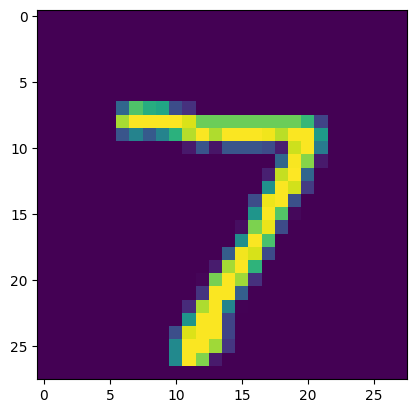

In [4]:
print(plt.imshow(x_test[0])) # 7

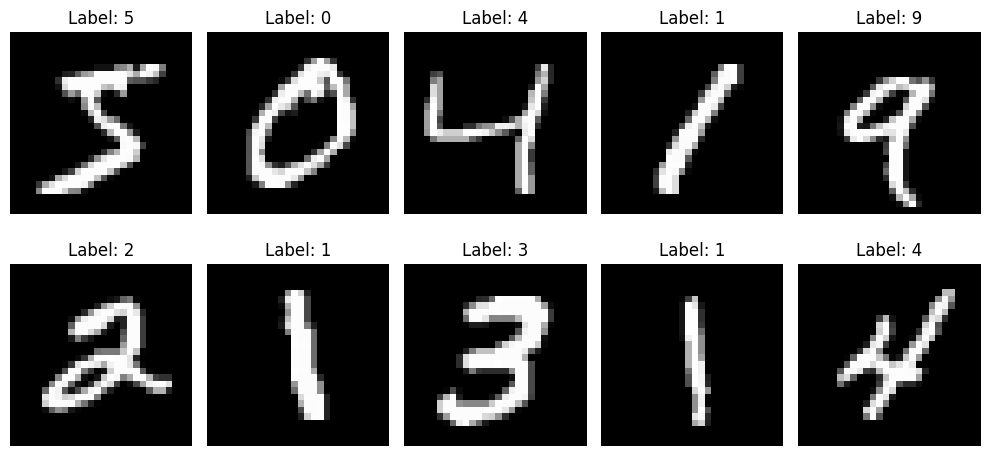

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.tight_layout()
plt.show()


In [6]:
print(x_train.dtype)
print(x_train.shape)
print("x_train min before normalising", np.min(x_train))
print("x_train max before normalising", np.max(x_train))

uint8
(60000, 28, 28)
x_train min before normalising 0
x_train max before normalising 255


In [7]:
# normalise data to [0,1]

x_train_normalized = np.expand_dims(x_train, axis=-1).astype('float32') / 255.0
x_test_normalized = np.expand_dims(x_test, axis=-1).astype('float32') / 255.0
print("--- After Normalization ---")
print("x_train_normalized dtype:", x_train_normalized.dtype) # Should be float32
print("x_train_normalized shape:", x_train_normalized.shape) # Should be (60000, 28, 28, 1)
print("x_train_normalized min:", np.min(x_train_normalized)) # Should be 0.0
print("x_train_normalized max:", np.max(x_train_normalized)) # Should be 1.0
print("-" * 30)

--- After Normalization ---
x_train_normalized dtype: float32
x_train_normalized shape: (60000, 28, 28, 1)
x_train_normalized min: 0.0
x_train_normalized max: 1.0
------------------------------


Original Integer Label for first test image: 7
One-Hot Encoded Label for first test image: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


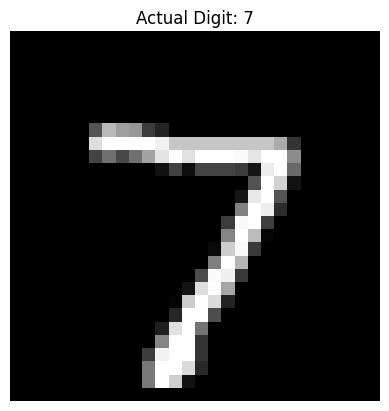

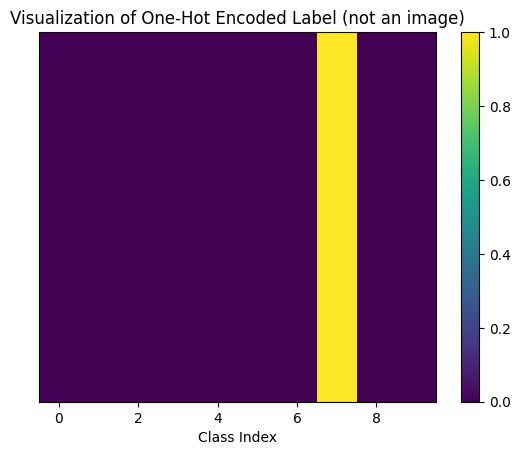

In [10]:
# This vector is all zeros except at the index corresponding to the original integer label, where it places a 1..
# One hot encoding-> predict probabilties for each class (loss function expects this format)

y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)
first_test_img = x_test[0]
first_test_label_int = y_test[0]
first_test_label_one_hot = y_test_categorical[0]
print(f"Original Integer Label for first test image: {first_test_label_int}")
print(f"One-Hot Encoded Label for first test image: {first_test_label_one_hot}")

# Display the image
plt.figure()
plt.imshow(first_test_img, cmap='gray')
plt.title(f"Actual Digit: {first_test_label_int}")
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(first_test_label_one_hot.reshape(1, 10), cmap='viridis', aspect='auto') # Reshape to make it 2D
plt.title("Visualization of One-Hot Encoded Label (not an image)")
plt.xlabel("Class Index")
plt.yticks([])
plt.colorbar()
plt.show()

In [13]:
# Model defination
'''
akes a 28x28x1 grayscale image as input.
Applies two blocks of convolution (to learn features) and max pooling (to downsample and make features more robust).
Flattens the resulting 2D feature maps into a 1D vector.
Passes this vector through a fully connected layer with 10 neurons and a softmax activation to produce a probability distribution over the 10 digit classes.
'''
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    # Dense : takes raw output scores from 10 neurons and converts them into prob distr.
    # Input Shape to this layer : 3136 features (7 * 7 * 64 channels), Output Shape : (10)
    layers.Dense(10, activation='softmax')])

In [15]:
adam_optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam_optimiser, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,186 (196.04 KB)

 Trainable params: 50,186 (196.04 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
def predict(model, image, num_classes):
  ''' to predict new custom image '''
  try:
    img = Image.open(image).convert('L')
    img = img.resize((28, 28))
    # normalising (convert to numpy)
    img_arr = np.array(img)
    img_arr_normalised = img_arr.astype('float32') / 255.0
    img_tensor = np.expand_dims(img_arr_normalised, axis=-1) # add channel dimension (from 28, 28 = (28,28,1)) for greyscale
    img_tensor = np.expand_dims(img_tensor, axis=0) # batch dimension (add batch size (1, 28, 28, 1) : batch_size, ht, width, channels) to structure single image as batch of one bcs nn models are designed to process data in batches.
  except Exception as e:
    print(f"Error processing image at path {image}: {e}")
    return None

  prediction = model.predict(img_tensor)
  predicted_class = np.argmax(prediction)
  print(f"Prediction for {Path(image).name}")
  print("Probabilities of Classes")
  for i, val in enumerate(prediction[0]):
    print(f"Class {i}: {val * 100: .2f}%")

  print(f"Predicted Digit : {predicted_class}")

# for a batch
def predict_on_MNIST_batch(model, images, labels, num_classes):
  if not images.size:
    print("No Images to process")
    return
  img = np.expand_dims(images, axis=-1).astype('float32') / 255.0
  predictions = model.predict(img)
  for i, prediction in enumerate(predictions):
    predicted_class = np.argmax(prediction)
    true_label = labels[i]
    print(f"\nPrediction for image {i+1} (True Label: {true_label})")
    print("Probabilities of Classes")
    for j, val in enumerate(prediction):
      print(f"Class {j}: {val * 100: .2f}%")
    print(f"Predicted Digit : {predicted_class}")


In [39]:
if __name__ == "__main__":
  MODEL_FILENAME = "model.h5"
  model_filepath = Path.cwd() / MODEL_FILENAME
  if model_filepath.exists():
    print(f"loading pretrained model from {model_filepath}")
    model = models.load_model(model_filepath)
  else:
    print("training new model")
    history = model.fit(x_train_normalized, y_train_categorical, epochs=10, batch_size=32, validation_split=0.1)
    model.save(model_filepath)
    print(f"Model saved to {model_filepath}")

loading pretrained model from /content/model.h5


In [40]:

sample_img_path = Path.cwd() / "sample_digit.jpg"
predict(model, sample_img_path, 10)
# Select batch of 10 images from test set
num_test_images = 10
test_images_batch = x_test[:num_test_images]
test_labels_batch = y_test[:num_test_images]
predict_on_MNIST_batch(model, test_images_batch, test_labels_batch, 10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Prediction for sample_digit.jpg
Probabilities of Classes
Class 0:  0.00%
Class 1:  0.00%
Class 2:  0.00%
Class 3:  0.00%
Class 4:  0.00%
Class 5:  0.00%
Class 6:  0.00%
Class 7:  0.00%
Class 8:  0.00%
Class 9:  100.00%
Predicted Digit : 9


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step

Prediction for image 1 (True Label: 7)
Probabilities of Classes
Class 0:  0.00%
Class 1:  0.00%
Class 2:  0.00%
Class 3:  0.00%
Class 4:  0.00%
Class 5:  0.00%
Class 6:  0.00%
Class 7:  100.00%
Class 8:  0.00%
Class 9:  0.00%
Predicted Digit : 7

Prediction for image 2 (True Label: 2)
Probabilities of Classes
Class 0:  0.00%
Class 1:  0.00%
Class 2:  100.00%
Class 3:  0.00%
Class 4:  0.00%
Class 5:  0.00%
Class 6:  0.00%
Class 7:  0.00%
Class 8:  0.00%
Class 9:  0.00%
Predicted Digit : 2

Prediction for image 3 (True Label: 1)
Probabilities of Classes
Class 0:  0.00%
Class 1:  100.00%
Class 2:  0.00%
Class 3:  0.00%
Class 4:  0.00%
Class 5:  0.00%
Class 6:  0.00%
Class 7:  0.00%
Class 8:  0.00%
Class 9:  0.00%
Predicted Digit : 1

Prediction for image 4 (True Label: 0)
Probabilities of Classes
Class 0:  100.00%
Class 1:  0.00%
Class 2:  0.00%
Class 3:  0.00%
Class 4:  0.00%
Class 5:  0.00%
Class 6:  0.00%
Class 7:  0.00%
Class 8:  0.00%
Class 9: 

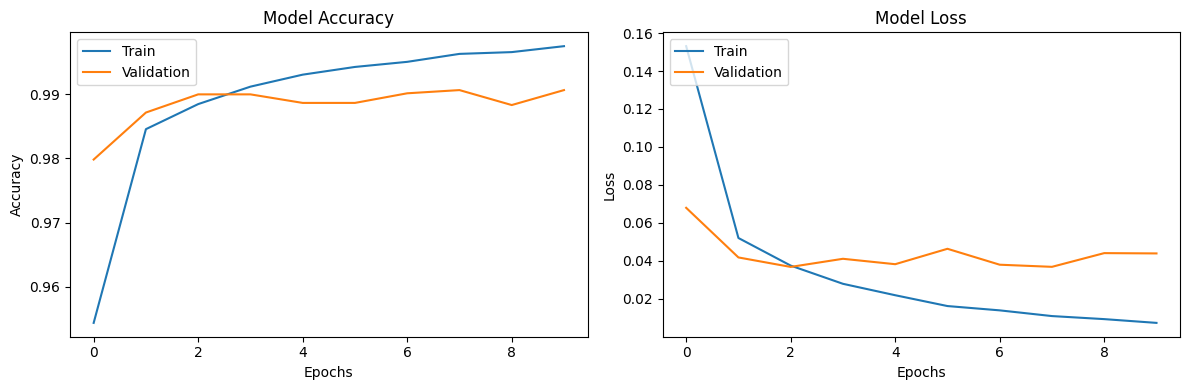

In [41]:
# Generating Graph for loss and accuracy
# Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Accuracy')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()